### Importing Basic Packages 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Importing the Datasets 

In [5]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv('test.csv')

### Combining training and test sets for Pre-processing

In [6]:
data=train_data.drop("Survived",axis=1).append(test_data,sort=False)
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handling Missing Values

In [7]:
# Handling Missing Values
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Drop the Cabin column because it has lots of missing values

In [8]:
data.drop('Cabin',axis=1,inplace=True)

In [9]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
data['Fare'].fillna(data['Fare'].mode()[0],inplace=True)

In [11]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

###  EDA

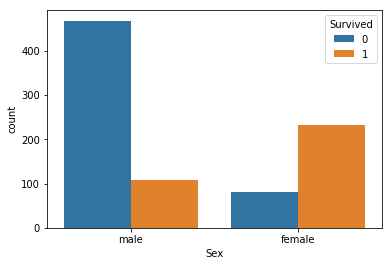

In [12]:
sns.countplot(x='Sex',data=data[:891],hue=train_data['Survived'])

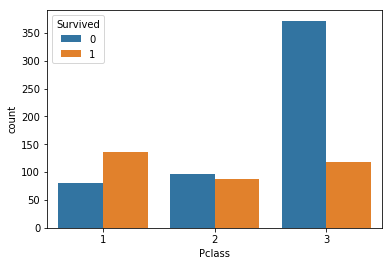

In [13]:
sns.countplot(x='Pclass',data=data[:891],hue=train_data['Survived'])

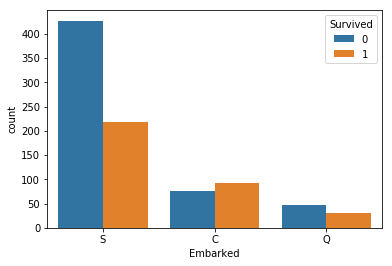

In [14]:
sns.countplot(x='Embarked',data=data[:891],hue=train_data['Survived'])

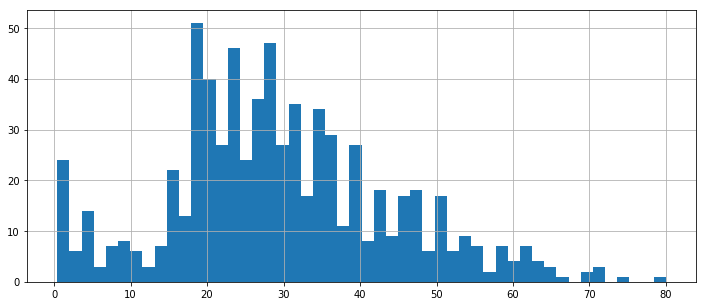

In [15]:
train_data['Age'].hist(bins=50,figsize=(12,5))

Convert 'Age' to Discrete Variables

In [16]:
data.loc[data['Age']<=13,'Age']=0
data.loc[(data['Age']>13) & (data['Age']<=40) ,'Age']=1
data.loc[data['Age']>40,'Age']=3

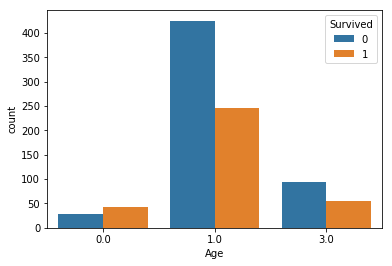

In [17]:
sns.countplot(x='Age',data=data[:891],hue=train_data['Survived'])

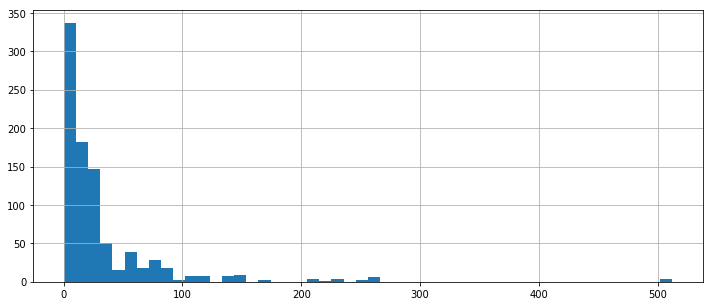

In [18]:
train_data['Fare'].hist(bins=50,figsize=(12,5))

Convert 'Fare' to Discrete Variables

In [19]:
data.loc[data['Fare']<=10,'Fare']=0
data.loc[(data['Fare']>10) & (data['Fare']<=90) ,'Fare']=1
data.loc[data['Fare']>90,'Fare']=2

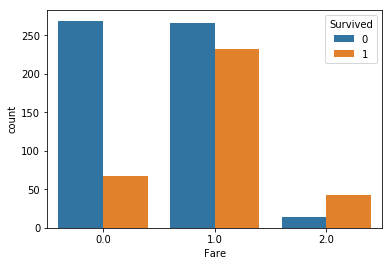

In [20]:
sns.countplot(x='Fare',data=data[:891],hue=train_data['Survived'])

Creating a new feature 'Is_Alone' based on 'SibSp' and 'Parch'

In [21]:
data['Family_Size']=data.SibSp + data.Parch +1
data['Is_Alone']=np.where(data['Family_Size']>1,0,1)

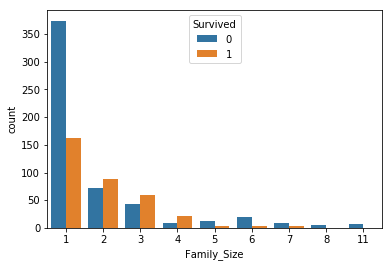

In [22]:
sns.countplot(x='Family_Size',data=data[:891],hue=train_data['Survived'])

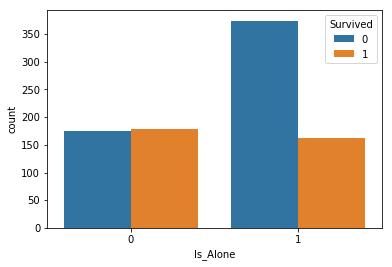

In [23]:
sns.countplot(x='Is_Alone',data=data[:891],hue=train_data['Survived'])

Droping the Features which do not have any Correlation with the Target 'Survived'

In [24]:
data.drop(['Ticket','Name','SibSp','Parch','Family_Size'],axis=1,inplace=True)

In [25]:
data.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Is_Alone
0,1,3,male,1.0,0.0,S,0
1,2,1,female,1.0,1.0,C,0
2,3,3,female,1.0,0.0,S,1
3,4,1,female,1.0,1.0,S,0
4,5,3,male,1.0,0.0,S,1
5,6,3,male,1.0,0.0,Q,1
6,7,1,male,3.0,1.0,S,1
7,8,3,male,0.0,1.0,S,0
8,9,3,female,1.0,1.0,S,0
9,10,2,female,1.0,1.0,C,0


Pre-processed Training Data

In [26]:
X=data.iloc[:891,1:].values
y=train_data['Survived'].values

### Label and One Hot Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 4] = labelencoder_X.fit_transform(X[:, 4])
onehotencoder = OneHotEncoder(categorical_features = [4])
X= onehotencoder.fit_transform(X).toarray()
X=X[:,1:]

### Splitting the data into Training and Test Sets

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


### Evaluation and Cross-Validation function which will be used in every model

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
def evaluation_metrics():
    cm=confusion_matrix(y_test,y_pred)
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:",accuracy_score(y_test,y_pred))

In [30]:
from sklearn.model_selection import cross_val_score
def K_Fold():
    accuracies_f=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
    print("Mean Accuracy:",accuracies_f.mean())
    print("Std:",accuracies_f.std())

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_pred=classifier.predict(X_test)

In [33]:
evaluation_metrics()

Confusion Matrix:
[[117  22]
 [ 25  59]]
Accuracy: 0.7892376681614349


In [34]:
K_Fold()

Mean Accuracy: 0.7919493441881502
Std: 0.036042241988350585


### XGBoost with GridSearchCV

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
classifier=XGBClassifier()
optimization_dict = {'max_depth': [2,4,6,10],
                     'n_estimators': [50,100,200,300,1000,3000],
                    'learning_rate':[0.001,0.01,0.05,0.1],
                    'gamma':[0,0.1,0.5,1]}

gridsearch = GridSearchCV(classifier, optimization_dict, 
                     scoring='accuracy', verbose=1)
gridsearch.fit(X_train,y_train)
print("best_accuracy:",gridsearch.best_score_)
print("best_parameters:",gridsearch.best_params_)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
best_accuracy: 0.8263473053892215
best_parameters: {'gamma': 0.5, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 50}


[Parallel(n_jobs=1)]: Done 1152 out of 1152 | elapsed: 10.3min finished


In [36]:
classifier=XGBClassifier(max_depth=4, n_estimators= 50,learning_rate=0.001,gamma=0.5)
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.5,
       learning_rate=0.001, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [37]:
y_pred=classifier.predict(X_test)

In [38]:
evaluation_metrics()

Confusion Matrix:
[[123  16]
 [ 31  53]]
Accuracy: 0.7892376681614349


In [39]:
K_Fold()

Mean Accuracy: 0.8249208502939845
Std: 0.02884526308792462


### Decision Tree

In [40]:
#------------------Decision Trees-----------------
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [41]:
y_pred=classifier.predict(X_test)

In [42]:
evaluation_metrics()

Confusion Matrix:
[[121  18]
 [ 30  54]]
Accuracy: 0.7847533632286996


In [43]:
K_Fold()

Mean Accuracy: 0.8054726368159203
Std: 0.026182089513330044


### Random Forest

In [44]:
### ---------------Random Forest---------------
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:
y_pred=classifier.predict(X_test)

In [46]:
evaluation_metrics()

Confusion Matrix:
[[119  20]
 [ 29  55]]
Accuracy: 0.7802690582959642


In [47]:
K_Fold()

Mean Accuracy: 0.8009271822704658
Std: 0.019781946647042355


### Support Vector Machine with GridSearchCV

In [48]:
from sklearn.svm import SVC
classifier=SVC()
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
             ]
gridsearch=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
gridsearch.fit(X_train,y_train)
print("best_accuracy:",gridsearch.best_score_)
print("best_parameters:",gridsearch.best_params_)

best_accuracy: 0.8248502994011976
best_parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [49]:
classifier=SVC(C=10, gamma=0.1, kernel= 'rbf')
classifier.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
y_pred=classifier.predict(X_test)

In [51]:
evaluation_metrics()

Confusion Matrix:
[[124  15]
 [ 31  53]]
Accuracy: 0.7937219730941704


In [52]:
K_Fold()

Mean Accuracy: 0.8249434644957034
Std: 0.027114880518170188


### Naive Bayes

In [53]:
#-------------Naive Bayes----------------------------------------------------
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None)

In [54]:
y_pred=classifier.predict(X_test)

In [55]:
evaluation_metrics()

Confusion Matrix:
[[112  27]
 [ 19  65]]
Accuracy: 0.7937219730941704


In [56]:
K_Fold()

Mean Accuracy: 0.7680687471732248
Std: 0.04303634098360744


### K Nearest Neighobors

Text(0,0.5,'Error Rate')

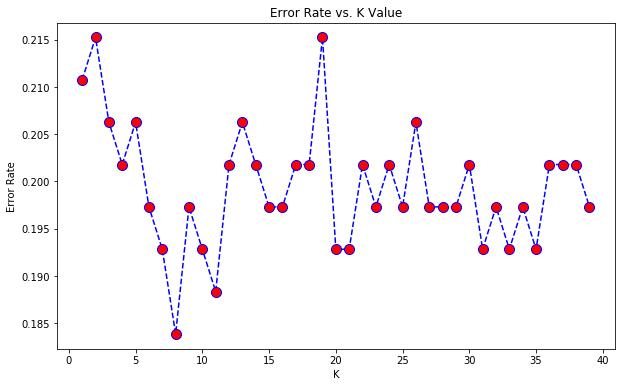

In [57]:
#--------------K Nearest Neighobors------
from sklearn.neighbors import KNeighborsClassifier

# Choosing number of Neighbors
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [58]:
classifier=KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [59]:
y_pred=classifier.predict(X_test)

In [60]:
evaluation_metrics()

Confusion Matrix:
[[127  12]
 [ 32  52]]
Accuracy: 0.8026905829596412


In [61]:
K_Fold()

Mean Accuracy: 0.7843735866123926
Std: 0.03326014037119153


### Building the Final model for Submission on Test Data

In [62]:
test=data.iloc[891:,1:].values

In [63]:
# Encoding categorical data(Test Data)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
test[:,1] = labelencoder_X.fit_transform(test[:, 1])
test[:, 4] = labelencoder_X.fit_transform(test[:, 4])
onehotencoder = OneHotEncoder(categorical_features = [4])
test= onehotencoder.fit_transform(test).toarray()
test=test[:,1:]


In [64]:
classifier=XGBClassifier(max_depth=4, n_estimators= 50,learning_rate=0.001,gamma=0.5)
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.5,
       learning_rate=0.001, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [65]:
pred=classifier.predict(test)

In [66]:
pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':pred}).set_index('PassengerId').to_csv('Final_Submission.csv')